<a href="https://colab.research.google.com/github/smch0000/TensorFlow_excersise/blob/master/Tensorflow01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic modules & framework

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Week 1 (Intro to Tensorflow)

In [0]:
from tensorflow import keras

# Linear House Price Pridiction
def house_model(y_new):
  x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
  y = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

# Model 
  model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
  model.compile(optimizer='sgd', loss="mean_squared_error")
  model.fit(x, y, epochs = 500)
  return model.predict(y_new)[0]

# Instance of the Model
p1 = house_model([7.0])
print(p1)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 15.2167
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 7.0506
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 3.2711
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1.5217
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7120
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3372
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0833
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 13/500
1/1 [==============================] - 0s 2ms/s

# Week 2 (Computer Vision basics)

In [0]:
# Callback class for termination of Calculation if a certain accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy, termination futher calculation")
      self.model.stop_training = True

In [0]:
# Loading the MNIST Handwritten dataset of digits
def load_data():

  mnist = tf.keras.datasets.mnist
  (x_train, y_train),(x_test, y_test) = mnist.load_data()
  x_train =x_train/255.0
  x_test  =x_test/255.0

  return(x_train,y_train,x_test,y_test)

In [0]:
x_train,y_train,x_test,y_test = load_data()

Traing Images Shape: (60000, 28, 28) 
Traing Labels Shape: (60000,) 
Test Images Shape: (10000, 28, 28) 
Test Labels Shape: (10000,)


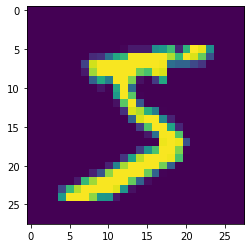

In [0]:
# Example image and Dataset Shape
plt.imshow(x_train[0])

print("Traing Images Shape: " +str(x_train.shape),
"\nTraing Labels Shape: " +str(y_train.shape),
"\nTest Images Shape: " +str(x_test.shape),
"\nTest Labels Shape: " +str(y_test.shape),)

In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
# Model 2 
def train_mnist():

  mcall = myCallback()
  model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
  model.compile(optimizer =tf.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  model.fit(x_train,y_train, epochs=10, callbacks=[mcall])
  return model

# Instance of Model 2
model_2 = train_mnist()  

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1838 - accuracy: 0.9448
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0743 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9907
Reached 99% accuracy, termination futher calculation
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270 - accuracy: 0.9907


In [0]:
# Model 2 Summary
 model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  803840    
_________________________________________________________________
dense_2 (Dense)              multiple                  10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Evaluation of Model 2 on unseen data
model_pred=model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9791


In [14]:
print("Loss:\t\t" +str(model_pred[0]),
      "\nAccuracy:\t" +str(model_pred[1]))

Loss:		0.07334857434034348 
Accuracy:	0.9790999889373779
